In [25]:
%load_ext autoreload
%autoreload 2

from IPython.display import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import math
import json
import numpy as np
import jax
import jax.numpy as jnp
import flax
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import timecast as tc

from mpl_toolkits import mplot3d

plt.rcParams['figure.figsize'] = [20, 10]

import tqdm.notebook as tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
x = jnp.sin(jnp.linspace(0, 1024 * math.pi, 10241))

In [41]:
loc = 0.0
scale = 1.0
x_noise = x + jax.random.normal(jax.random.PRNGKey(0), x.shape) * scale + loc

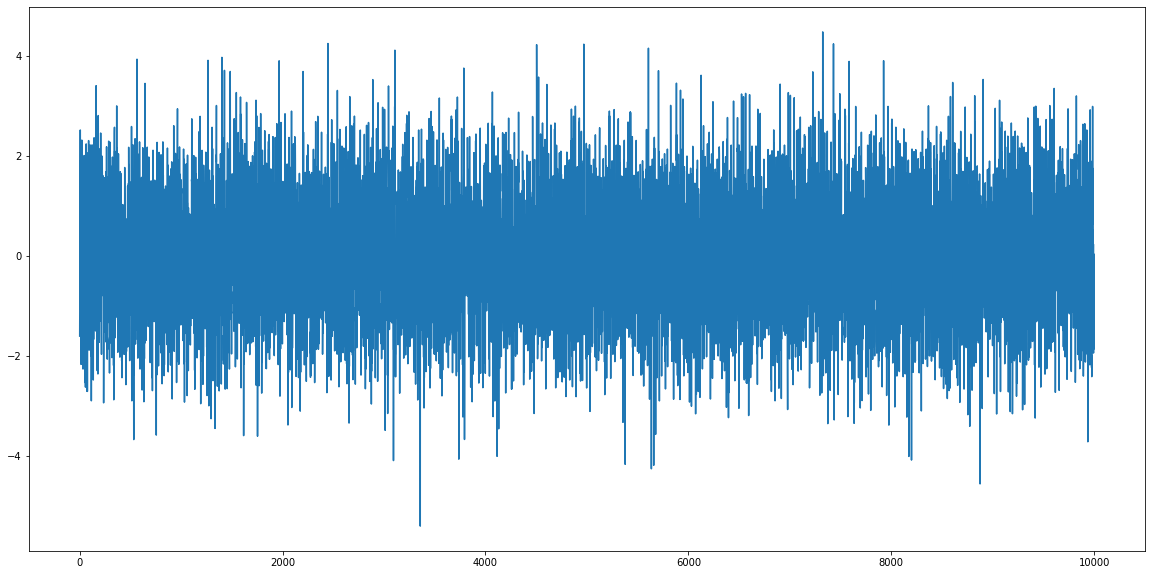

In [42]:
plt.plot(x_noise)

In [43]:
from timecast.learners import PCR

In [78]:
@tc.experiment("loc", [0.0])
@tc.experiment("scale", [0.1, 0.5, 1.0, 5.0, 10.0])
@tc.experiment("history_len", [100])
@tc.experiment("k", [1, 2, 4, 8, 16, 32, 64])
@tc.experiment("lr", [-5])
def runner(loc, scale, history_len, k, lr):
    import math
    import jax
    import jax.numpy as jnp
    from timecast.learners import PCR
    from timecast.optim import GradientDescent
    from timecast import tscan
    
    # Train
    x = jnp.sin(jnp.linspace(0, 1024 * math.pi, 10241))
    x += jax.random.normal(jax.random.PRNGKey(0), x.shape) * scale + loc
    x, y = x[:-1], x[1:]
    model, state = PCR.fit([(x, y, None)], input_dim=1, history_len=history_len, k=k)
    
    # Test
    x = jnp.sin(jnp.linspace(0, 1024 * math.pi, 10241))
    x += jax.random.normal(jax.random.PRNGKey(0), x.shape) * scale + loc
    x, y = x[:-1], x[1:]
    x = x.reshape(-1, 1)
    print(x.shape, x.ndim)
    
    optim_def = GradientDescent(learning_rate=10 ** lr)
    optimizer = optim_def.create(model)
    
    y_hat, optimizer, state = tscan(x, y, optimizer, state=state)
    
    return {
        "loc": loc,
        "scale": scale,
        "history_len": history_len,
        "k": k,
        "lr": lr,
        "mse": jnp.square(y - y_hat).mean()
    }
    

In [79]:
results = runner.run(tqdm=tqdm)

(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2



In [80]:
results

[{'loc': 0.0,
  'scale': 0.1,
  'history_len': 100,
  'k': 1,
  'lr': -5,
  'mse': DeviceArray(0.50855255, dtype=float32)},
 {'loc': 0.0,
  'scale': 0.1,
  'history_len': 100,
  'k': 2,
  'lr': -5,
  'mse': DeviceArray(1.0491817, dtype=float32)},
 {'loc': 0.0,
  'scale': 0.1,
  'history_len': 100,
  'k': 4,
  'lr': -5,
  'mse': DeviceArray(1.0491863, dtype=float32)},
 {'loc': 0.0,
  'scale': 0.1,
  'history_len': 100,
  'k': 8,
  'lr': -5,
  'mse': DeviceArray(1.0491923, dtype=float32)},
 {'loc': 0.0,
  'scale': 0.1,
  'history_len': 100,
  'k': 16,
  'lr': -5,
  'mse': DeviceArray(1.0492038, dtype=float32)},
 {'loc': 0.0,
  'scale': 0.1,
  'history_len': 100,
  'k': 32,
  'lr': -5,
  'mse': DeviceArray(1.0492301, dtype=float32)},
 {'loc': 0.0,
  'scale': 0.1,
  'history_len': 100,
  'k': 64,
  'lr': -5,
  'mse': DeviceArray(1.0492704, dtype=float32)},
 {'loc': 0.0,
  'scale': 0.5,
  'history_len': 100,
  'k': 1,
  'lr': -5,
  'mse': DeviceArray(0.750307, dtype=float32)},
 {'loc': 0.0,

In [75]:
@tc.experiment("loc", [0.0])
@tc.experiment("scale", [0.1, 0.5, 1.0, 5.0, 10.0])
@tc.experiment("history_len", [100])
@tc.experiment("lr", [-5])
def runner(loc, scale, history_len, lr):
    import math
    import jax
    import jax.numpy as jnp
    from timecast.learners import AR
    from timecast.optim import GradientDescent
    from timecast import tscan

    # Test
    x = jnp.sin(jnp.linspace(0, 1024 * math.pi, 10241))
    x += jax.random.normal(jax.random.PRNGKey(0), x.shape) * scale + loc
    x, y = x[:-1], x[1:]
    x = x.reshape(-1, 1)
    print(x.shape, x.ndim)
    
    model, state = AR.new(shape=(1, 1), history_len=history_len)
    
    optim_def = GradientDescent(learning_rate=10 ** lr)
    optimizer = optim_def.create(model)
    
    y_hat, optimizer, state = tscan(x, y, optimizer, state=state)
    
    return {
        "loc": loc,
        "scale": scale,
        "history_len": history_len,
        "lr": lr,
        "mse": jnp.square(y - y_hat).mean()
    }
    

In [76]:
results = runner.run(tqdm=tqdm)

(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2
(10240, 1) 2



In [77]:
results

[{'loc': 0.0,
  'scale': 0.1,
  'history_len': 100,
  'lr': -5,
  'mse': DeviceArray(0.8589651, dtype=float32)},
 {'loc': 0.0,
  'scale': 0.5,
  'history_len': 100,
  'lr': -5,
  'mse': DeviceArray(1.0862182, dtype=float32)},
 {'loc': 0.0,
  'scale': 1.0,
  'history_len': 100,
  'lr': -5,
  'mse': DeviceArray(1.8213642, dtype=float32)},
 {'loc': 0.0,
  'scale': 5.0,
  'history_len': 100,
  'lr': -5,
  'mse': DeviceArray(26.376379, dtype=float32)},
 {'loc': 0.0,
  'scale': 10.0,
  'history_len': 100,
  'lr': -5,
  'mse': DeviceArray(112.20194, dtype=float32)}]